# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [2]:
import pandas as pd
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

vocabulary = set() #conjunto no tiene indicies y no tiene elementos duplicados

for doc in documents: # Iterar sobre cada documento
    for word in doc.lower().strip(".").split(): # Iterar sobre cada  palabra en el documento       
        vocabulary.add(word) # Agregar la palabra al vocabulario       
print(len(vocabulary))

for term in vocabulary: # Iterar sobre cada palabra en el vocabulario
    print(term) # Imprimir la palabra



20
la
debajo
y
cómoda
perro
importante
el
es
limpieza
gato
del
limpia
de
cama
se
estaba
en
jugaron
escondió
jardín


In [3]:
dict_tf={}
i=0
for doc in documents:
    dict_tfd={} # Crear un diccionario para cada documento
    for term in vocabulary:
            count=doc.lower().strip('.').count(term)
            dict_tfd[term]=count
    print(doc, dict_tfd)
    dict_tf[i]=dict_tfd # Agregar el diccionario del documento al diccionario de términos
    i += 1
print(dict_tf)
#Haz que  el dataframe tenga la columna de terminos y las columnas de los documentos donde aparezca el numero de veces que aparece la palabra


El gato se escondió debajo de la cama. {'la': 1, 'debajo': 1, 'y': 0, 'cómoda': 0, 'perro': 0, 'importante': 0, 'el': 1, 'es': 1, 'limpieza': 0, 'gato': 1, 'del': 0, 'limpia': 0, 'de': 2, 'cama': 1, 'se': 1, 'estaba': 0, 'en': 0, 'jugaron': 0, 'escondió': 1, 'jardín': 0}
La cama estaba limpia y cómoda. {'la': 1, 'debajo': 0, 'y': 1, 'cómoda': 1, 'perro': 0, 'importante': 0, 'el': 0, 'es': 1, 'limpieza': 0, 'gato': 0, 'del': 0, 'limpia': 1, 'de': 0, 'cama': 1, 'se': 0, 'estaba': 1, 'en': 0, 'jugaron': 0, 'escondió': 0, 'jardín': 0}
El perro y el gato jugaron en el jardín. {'la': 0, 'debajo': 0, 'y': 1, 'cómoda': 0, 'perro': 1, 'importante': 0, 'el': 3, 'es': 0, 'limpieza': 0, 'gato': 1, 'del': 0, 'limpia': 0, 'de': 0, 'cama': 0, 'se': 0, 'estaba': 0, 'en': 1, 'jugaron': 1, 'escondió': 0, 'jardín': 1}
La limpieza del jardín es importante. {'la': 1, 'debajo': 0, 'y': 0, 'cómoda': 0, 'perro': 0, 'importante': 1, 'el': 1, 'es': 1, 'limpieza': 1, 'gato': 0, 'del': 1, 'limpia': 0, 'de': 1, 'c

In [31]:
# Crear un DataFrame a partir del diccionario
matriz = pd.DataFrame(dict_tf)
matriz.T

,la,debajo,y,cómoda,perro,importante,el,es,limpieza,gato,del,limpia,de,cama,se,estaba,en,jugaron,escondió,jardín
0,1,1,0,0,0,0,1,1,0,1,0,0,2,1,1,0,0,0,1,0
1,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,1,0,3,0,0,1,0,0,0,0,0,0,1,1,0,1
3,1,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,1


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)



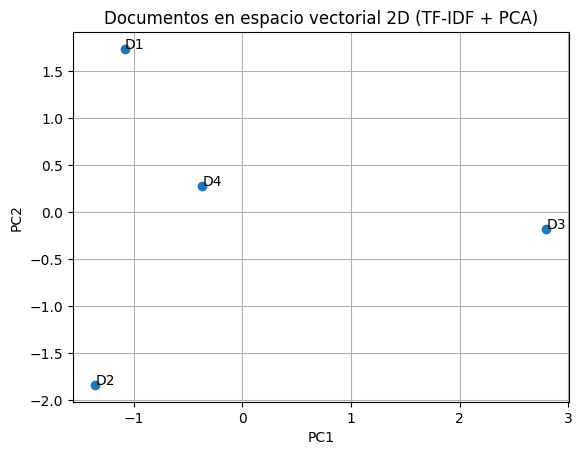

In [6]:
import matplotlib.pyplot as plt

# Reducción PCA y visualización 2D
plt.scatter(docs_2d[:, 0], docs_2d[:, 1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i, 0], docs_2d[i, 1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()


# Reducción PCA y visualización 3D

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

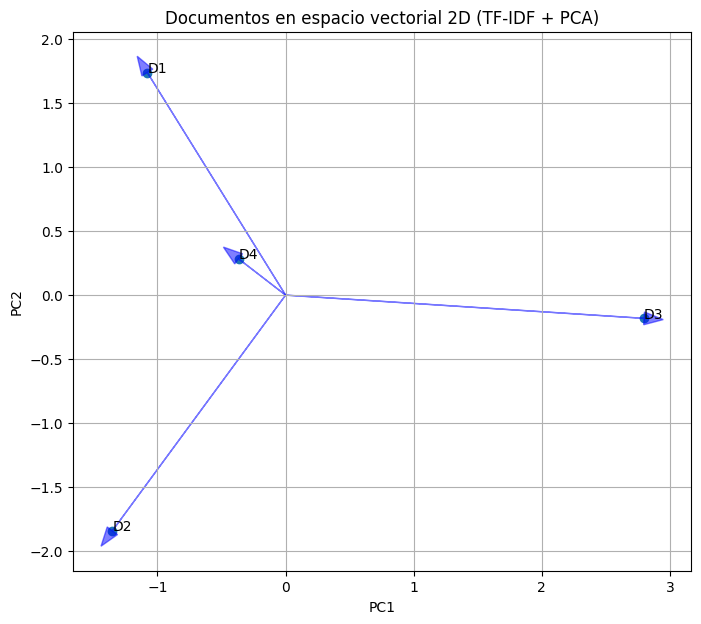

In [7]:
# Visualización de vectores en 2D
plt.figure(figsize=(10, 7))
plt.scatter(docs_2d[:, 0], docs_2d[:, 1])   
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i, 0], docs_2d[i, 1]))
for x, y in docs_2d:  # Corregido: desempaquetar directamente x, y
    plt.arrow(0, 0, x, y, head_width=0.1, fc='blue', ec='blue', alpha=0.5)
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

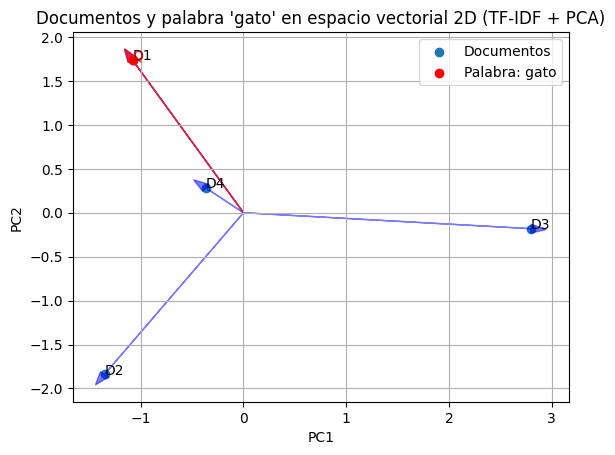

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Obtener el índice de la palabra "gato" en la matriz original
if "gato" in matriz.index:
    vector_gato = matriz.loc["gato"].values.reshape(1, -1)  # Vector de la palabra "gato"
    vector_gato_full = np.zeros((1, len(vocabulary)))  # Crear un vector de ceros con el tamaño del vocabulario
    for i, term in enumerate(matriz.index):  # Llenar el vector con los valores correspondientes
        if term in matriz.index:
            vector_gato_full[0, i] = matriz.loc[term, :].values[0]
    vector_gato = pd.DataFrame(vector_gato_full, columns=matriz.index)  # Asegurar nombres de columnas
    vector_gato_2d = pca.transform(vector_gato)  # Transformar el vector con PCA

    # Reducción PCA y visualización 2D
    plt.scatter(docs_2d[:, 0], docs_2d[:, 1], label="Documentos")  # Etiqueta para documentos
    for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
        plt.annotate(txt, (docs_2d[i, 0], docs_2d[i, 1]))

    # Dibujar flechas desde el origen hacia los documentos
    for x, y in docs_2d:
        plt.arrow(0, 0, x, y, head_width=0.1, fc='blue', ec='blue', alpha=0.5)

    # Representar la palabra "gato"
    plt.scatter(vector_gato_2d[:, 0], vector_gato_2d[:, 1], color="red", label="Palabra: gato")
    plt.annotate("Q", (vector_gato_2d[0, 0], vector_gato_2d[0, 1]), color="red")

    # Dibujar flecha desde el origen hacia la palabra "gato"
    plt.arrow(0, 0, vector_gato_2d[0, 0], vector_gato_2d[0, 1], head_width=0.1, fc='red', ec='red', alpha=0.7)

    plt.title("Documentos y palabra 'gato' en espacio vectorial 2D (TF-IDF + PCA)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.legend()  # Mostrar leyenda
    plt.show()
else:
    print("La palabra 'gato' no está en el vocabulario.")